In [ ]:
#initialisation des variables

#CR en latex, bonus: partie 3.2 et 5
#expliquer le principe du filtre de kalman
#faire les demos des formules

import numpy as np

# Paramètres
Te = 1.0  # Période du capteur
T = 100  # Longueur du scénario
sigma_Q = 1  # Écart-type pour Q
sigma_px = 30  # Écart-type pour px
sigma_py = 30  # Écart-type pour py

#de base [sigma_Q, sigma_px, sigma_py] = [1.0, 30.0, 30.0] --> erreur de 7, quasiment pas visible sur la figure
#test1: [sigma_Q, sigma_px, sigma_py] = [10, 300, 300] --> erreur de 89, assez visible sur la figure
#test2: [sigma_Q, sigma_px, sigma_py] = [10, 300, 300] --> erreur de 89, assez visible sur la figure
#verifier que pour une meme trajectoire, lorsque l'on varie le bruit d'observation, lèstimateur est moins bien et vice versa




In [ ]:
#Construction des matrices des matrice

Q = sigma_Q**2 * np.array([
    [Te**3 / 3, Te**2 / 2, 0, 0],
    [Te**2 / 2, Te, 0, 0],
    [0, 0, Te**3 / 3, Te**2 / 2],
    [0, 0, Te**2 / 2, Te]
])

F = np.array([
    [1, Te, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, Te],
    [0, 0, 0, 1]
])

H = np.array([
    [1, 0, 0, 0],
    [0, 0, 1, 0]
])

R = np.array([
    [sigma_px**2, 0],
    [0, sigma_py**2]
])

In [ ]:
# Vecteur d'état initial x_init
x_init = np.array([3, 40, -4, 20])

# Vecteur d'état estimé par le filtre de Kalman à l'instant k
x_kalm = x_init

# Initialisation de la matrice de covariance P_kalm comme la matrice identité 4x4
P_kalm = np.eye(4)



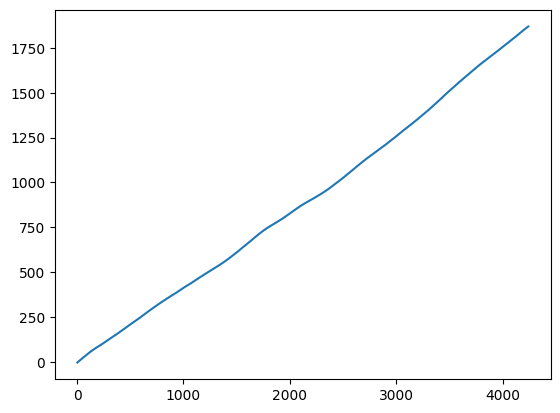

In [ ]:
def creer_trajectoire(F, Q, x_init, T):
  x = np.zeros((4,T))
  x[:,0] = x_init
  for i in range(1,T):
    U = np.random.multivariate_normal(mean=np.array([0,0,0,0]), cov=Q)
    x[:,i] = np.dot(F,x[:,i-1]) + U
  return x

vecteur_x = creer_trajectoire(F, Q, x_init, T)

import matplotlib.pyplot as plt
plt.plot(vecteur_x[0,:], vecteur_x[2,:])



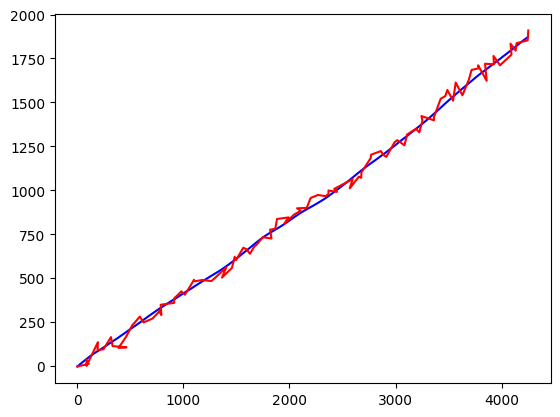

In [ ]:
def creer_observation(H, R, x, T):
  Y = np.zeros((2,T))
  Y[:,0] = np.array([x[0,0], x[2,0]])
  for i in range(1,T):
    V = np.random.multivariate_normal(mean=np.array([0,0]), cov=R)
    Y[:,i] = np.dot(H,x[:,i]) + V
  return Y

vecteur_y = creer_observation(H, R, vecteur_x, T)

plt.plot(vecteur_x[0,:], vecteur_x[2,:], color = 'blue')
plt.plot(vecteur_y[0,:], vecteur_y[1,:], color = 'red')


In [ ]:
P = np.zeros((T,4,4))
P[1,:,:]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

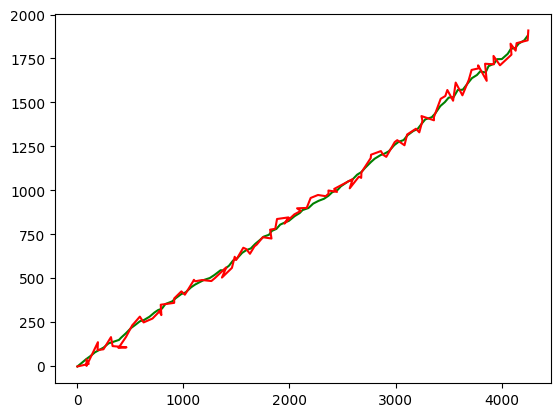

In [ ]:
def filtre_de_kalman(F, Q, H, R, y_k, x_kalm_prec, P_kalm_prec):
  x = x_kalm_prec
  P = P_kalm_prec
  x_int = np.dot(F,x)
  P_int = Q + np.dot(F,(np.dot(P, F.T)))
  #k = np.matmul(P_int, np.matmul(H.T, np.linalg.inv(np.matmul(H, np.matmul(P_int, H.T) + R))))
  k = P_int @ H.T @ np.linalg.inv(H @ P_int @ H.T + R)
  x = x_int + np.dot(k, y_k - np.dot(H, x_int))
  P = np.dot(np.eye(4) - np.dot(k,H), P_int)
  return x, P

#P = P_kalm = I4
x_est = np.zeros((4,T))
P = np.zeros((T,4,4))
x_est[:,0] = x_init
P[0,:,:] = P_kalm
for i in range(1,T):
  x_est[:,i] = filtre_de_kalman(F, Q, H, R, vecteur_y[:,i], vecteur_x[:,i-1], P[i-1,:,:])[0]
  P[i,:,:] = filtre_de_kalman(F, Q, H, R, vecteur_y[:,i], vecteur_x[:,i-1], P[i-1,:,:])[1]

plt.plot(x_est[0,:], x_est[2,:], color = 'green')
#plt.plot(vecteur_x[0,:], vecteur_x[2,:], color = 'blue')
plt.plot(vecteur_y[0,:], vecteur_y[1,:], color = 'red')

#print(x_est)

In [ ]:
def err_quad_moy(x_reel, x_est):
  n = x_reel.shape[1]
  s = 0
  for i in range(n):
    err_quad = np.dot((x_reel[:,i] - x_est[:,i]).T, x_reel[:,i] - x_est[:,i])
    s += np.sqrt(err_quad)
  return s/n
err_quad_moy(vecteur_x, x_est)


8.236142065562477

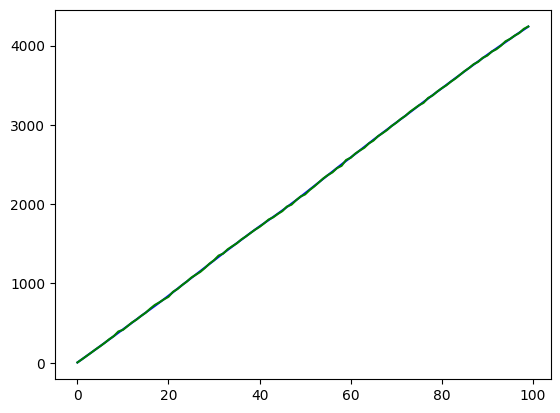

In [ ]:
plt.plot(np.array([i for i in range(T)]), vecteur_x[0,:], color = "blue")
plt.plot(np.array([i for i in range(T)]), x_est[0,:], color = "green")
#plt.plot(np.array([i for i in range(T)]), vecteur_y[0,:], color = 'red')

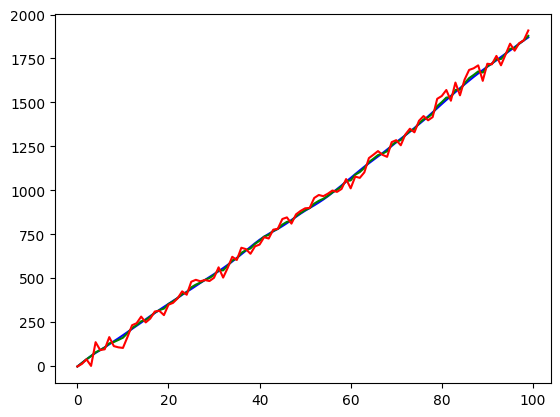

In [ ]:
plt.plot(np.array([i for i in range(T)]), vecteur_x[2,:], color = "blue")
plt.plot(np.array([i for i in range(T)]), x_est[2,:], color = "green")
plt.plot(np.array([i for i in range(T)]), vecteur_y[1,:], color = 'red')

In [ ]:
#variation des bruits de processus σQ, σpx et σpy.
